In [0]:
import pandas as pd
import numpy as np
import os
import pickle
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/train_jigsaw.csv .
!ls
df = pd.read_csv("train_jigsaw.csv")
df = df.dropna()
df.head()

adaboost.pkl			    dTree.pkl	       sample_data
appos.txt			    ensemble_vote.pkl  sequential.pkl
backimage.jpg			    gdrive	       train.csv
cleaned_text.pkl		    lr.pkl	       train_jigsaw.csv
d2v.model			    nb.pkl
d2v.model.docvecs.vectors_docs.npy  randForest.pkl


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
df['Toxicity'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

df.tail(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxicity
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,0


In [0]:
df.loc[df.Toxicity > 0, ['Toxicity']] = 1
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxicity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [0]:
datadf = df[['comment_text','Toxicity']]
#datadf = datadf.head(100)                            #333333333333333
datadf.head()

,comment_text,Toxicity
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/train.csv .
df_quora = pd.read_csv("train.csv")
df_quora = df_quora[['question_text', 'target']]
df_quora = df_quora.rename(columns={"question_text": "comment_text", "target": "Toxicity"})
df_quora.head()

,comment_text,Toxicity
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [0]:
print(len(datadf))
print(len(df_quora))
#datadf = pd.concat([datadf, df_quora], ignore_index=True, sort=False)
datadf = datadf.dropna()
print(len(datadf))

159571
1306122
159571


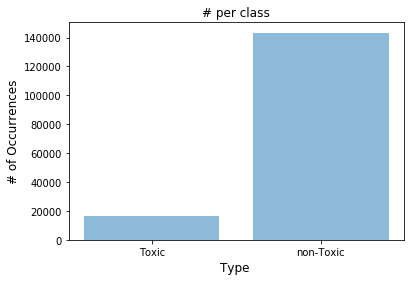

Toxic Content-> 16225
Non-Toxic Content-> 143346


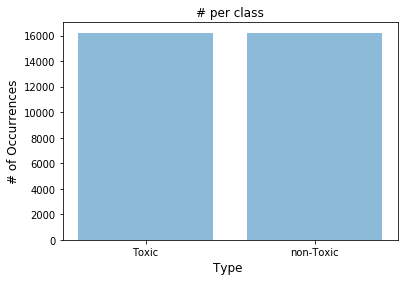

Toxic Content-> 16225
Non-Toxic Content-> 16225


In [0]:
import matplotlib.pyplot as plt

#data exploration
toxic = datadf[datadf.Toxicity ==  1]
nontoxic = datadf[datadf.Toxicity ==  0]

objects = ('Toxic', 'non-Toxic')
y_pos = np.arange(len(objects))
count = [len(toxic),len(nontoxic)]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Type ', fontsize=12)
plt.ylabel('# of Occurrences', fontsize=12)
plt.title("# per class")
plt.show()

print('Toxic Content->',len(toxic))
print('Non-Toxic Content->',len(nontoxic))

nontoxic = nontoxic.head(len(toxic))
datadf = pd.concat([toxic, nontoxic], ignore_index=True, sort=False)



toxic = datadf[datadf.Toxicity ==  1]
nontoxic = datadf[datadf.Toxicity ==  0]

objects = ('Toxic', 'non-Toxic')
y_pos = np.arange(len(objects))
count = [len(toxic),len(nontoxic)]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Type ', fontsize=12)
plt.ylabel('# of Occurrences', fontsize=12)
plt.title("# per class")
plt.show()

print('Toxic Content->',len(toxic))
print('Non-Toxic Content->',len(nontoxic))

In [0]:
import nltk
import string
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
ps = PorterStemmer()
appos_words = {}
!cp gdrive/My\ Drive/ALDA\ Capstone/appos.txt .
with open('appos.txt') as json_file:  
    appos_words = json.load(json_file)


def processText(text):
    
    #convert to lower case
    
    text = text.lower()
    
    #handle negation 
    
    words = text.split()
    text = [appos_words[word] if word in appos_words else word for word in words]
    text = " ".join(text)
    
    #tokenize words
    words = nltk.word_tokenize(text)
    
    #remove stop words
    words  = [i for i in words if i not in stop_words]
    
    #stem words
    #words = stemSentence(words)

    
    #remove standalone punctuations
    words = [word for word in words if word.isalpha()]
    
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
datadf['Processed_text'] = datadf.comment_text.apply(processText)

datadf.head()


,comment_text,Toxicity,Processed_text
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,"[cocksucker, piss, around, work]"
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,"[hey, talk, exclusive, group, wp, talibans, go..."
2,"Bye! \n\nDon't look, come or think of comming ...",1,"[bye, look, come, think, comming, back, tosser]"
3,You are gay or antisemmitian? \n\nArchangel WH...,1,"[gay, antisemmitian, archangel, white, tiger, ..."
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,"[fuck, filthy, mother, ass, dry]"


In [0]:
file_name = 'cleaned_text.pkl'
datadf.to_pickle(file_name)
!cp ./cleaned_text.pkl gdrive/My\ Drive/ALDA\ Capstone/

In [0]:
!cp gdrive/My\ Drive/ALDA\ Capstone/cleaned_text.pkl .
file_name = 'cleaned_text.pkl'
datadf = pd.read_pickle(file_name)


In [0]:
datadf.head()

,comment_text,Toxicity,Processed_text
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,"[cocksucker, piss, around, work]"
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,"[hey, talk, exclusive, group, wp, talibans, go..."
2,"Bye! \n\nDon't look, come or think of comming ...",1,"[bye, look, come, think, comming, back, tosser]"
3,You are gay or antisemmitian? \n\nArchangel WH...,1,"[gay, antisemmitian, archangel, white, tiger, ..."
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,"[fuck, filthy, mother, ass, dry]"


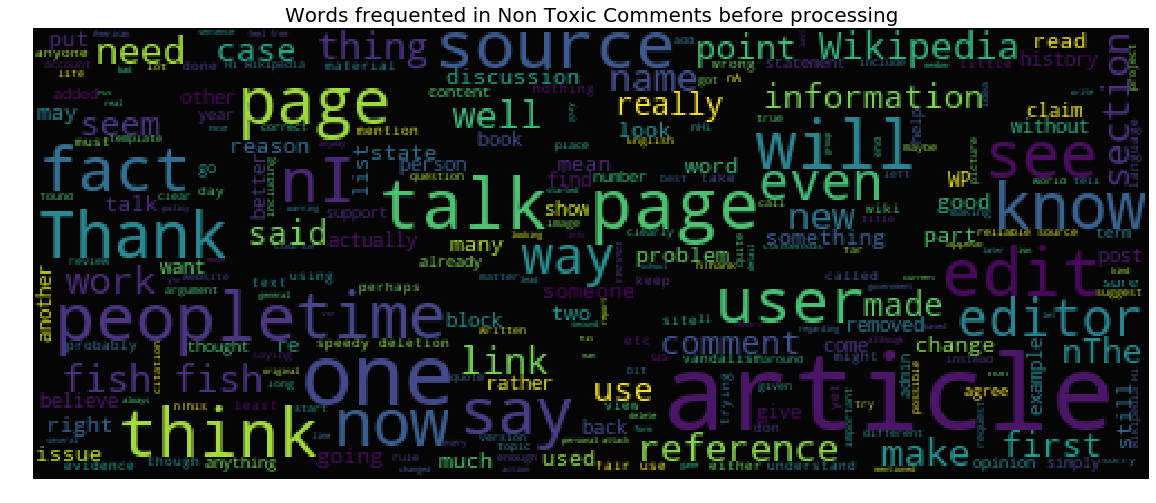

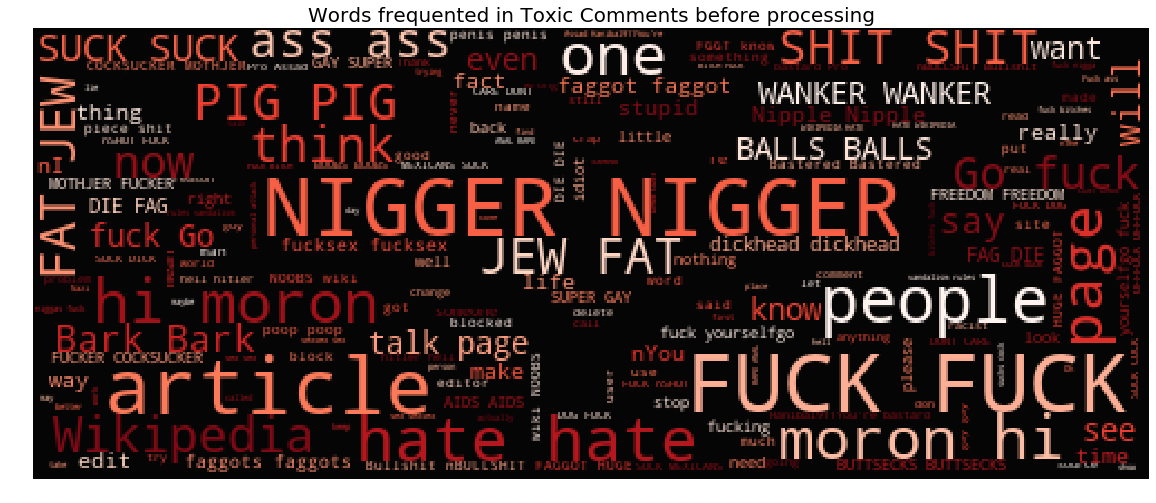

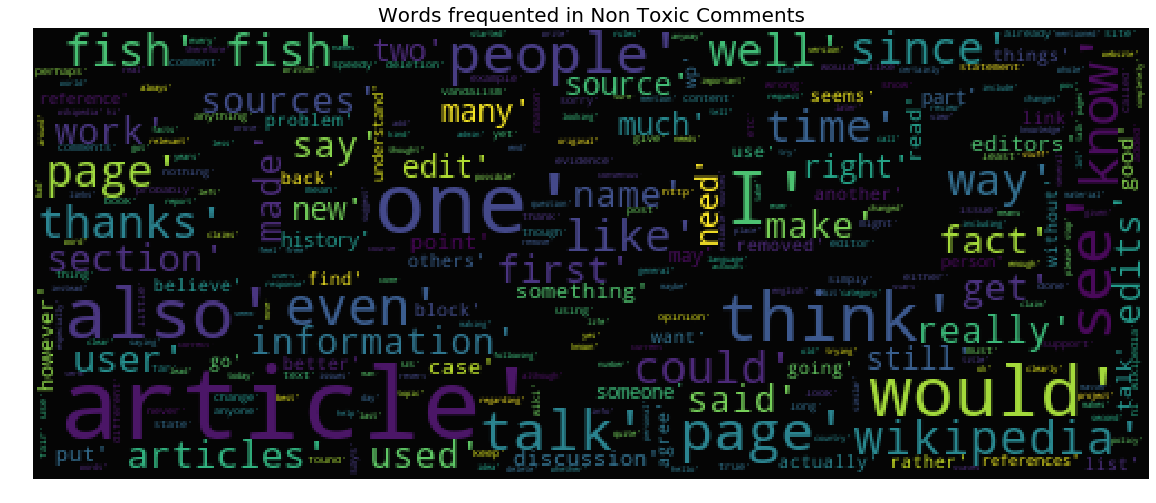

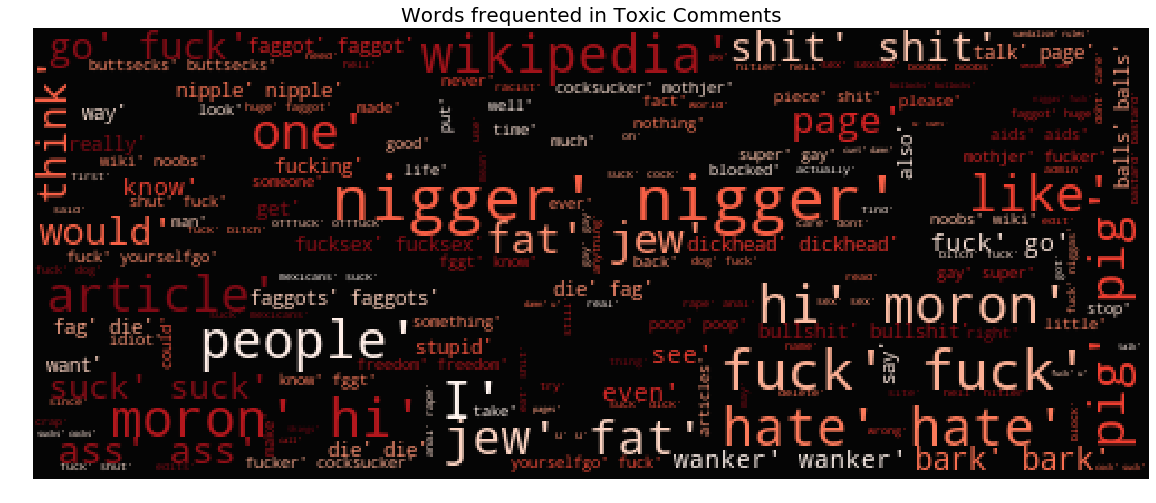

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
!cp gdrive/My\ Drive/ALDA\ Capstone/backimage.jpg .
mask = np.array(Image.open("backimage.jpg"))
mask = mask[:,:,1]

#check frequent words for non - toxic comments in original sentence
subset = datadf[datadf.Toxicity ==  0]
text = subset.comment_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non Toxic Comments before processing", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=200), alpha=0.98)
plt.show()


#check frequent words for toxic comments
subset = datadf[datadf.Toxicity ==  1]
text = subset.comment_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic Comments before processing", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=2534), alpha=0.98)
plt.show()


#check frequent words for non - toxic comments
subset = datadf[datadf.Toxicity ==  0]
text = subset.Processed_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Non Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=200), alpha=0.98)
plt.show()

#check frequent words for toxic comments
subset = datadf[datadf.Toxicity ==  1]
text = subset.Processed_text.values
temp = []
for words in text:
  temp.append(str(words))
  
text = str(temp)
wc = WordCloud(background_color="black",max_words=5000,mask=mask)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=2534), alpha=0.98)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
y = datadf['Toxicity']
x = datadf['Processed_text']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

train_count = y_train.value_counts()
test_count = y_test.value_counts()

print('Number of Toxic articles in Training set -> ', train_count[0])
print('Number of Non Toxic articles in Training set -> ', train_count[1])
print('Number of Toxic articles in Testing set -> ', test_count[0])
print('Number of Non Toxic articles in Testing set -> ', test_count[1])

Number of Toxic articles in Training set ->  12980
Number of Non Toxic articles in Training set ->  12980
Number of Toxic articles in Testing set ->  3245
Number of Non Toxic articles in Testing set ->  3245


In [0]:
model_dict = {}

In [0]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(
    words = _d, 
    tags = [str(i)]) for i, _d in enumerate(x_train)]

max_epochs = 15
vec_size = 300
alpha = 0.025

model = Doc2Vec(
    vector_size = vec_size,
    alpha = alpha, 
    min_alpha = 0.025,
    min_count = 5,
    window = 10,
    dm = 1)

model.build_vocab(tagged_data)
print('Training Doc2Vec Model')

for epoch in range(max_epochs):

    print('Training iteration {0}'.format(epoch + 1))
    
    model.train(tagged_data,
                total_examples = model.corpus_count,
                epochs = model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
model_dict['doc2vec'] = model
print("Model Saved")
!cp ./d2v.model gdrive/My\ Drive/ALDA\ Capstone/

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


Training Doc2Vec Model
Training iteration 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


Training iteration 2
Training iteration 3
Training iteration 4
Training iteration 5
Training iteration 6
Training iteration 7
Training iteration 8
Training iteration 9
Training iteration 10
Training iteration 11
Training iteration 12
Training iteration 13
Training iteration 14
Training iteration 15
Model Saved


In [0]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load("d2v.model")

#print(type(x_test))
test_data = []
for i in range(x_test.shape[0]):
    temp = np.concatenate([model.infer_vector(x_test.iloc[i])])
    test_data.append(temp)

train_data = []

for i in range(x_train.shape[0]):
    temp = model.docvecs[i]
    train_data.append(temp)
    

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=15, min_samples_leaf=1)
dt_clf.fit(train_data, y_train)

dt_y_pred_train = dt_clf.predict(train_data)
dt_y_pred_test = dt_clf.predict(test_data)

train_accuracy = accuracy_score(y_train, dt_y_pred_train)
test_accuracy = accuracy_score(y_test, dt_y_pred_test)

dTree_filename = 'dTree.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(dTree_filename, 'wb')
pickle.dump(dt_clf, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()
model_dict['dTree'] = dt_clf
print("Model Saved")

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  98.29352850539291
Test Accuracy ->  53.790446841294305


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(train_data, y_train)

nb_y_pred_train = nb.predict(train_data)
nb_y_pred_test = nb.predict(test_data)

train_accuracy = accuracy_score(y_train, nb_y_pred_train)
test_accuracy = accuracy_score(y_test, nb_y_pred_test)

nb_filename = 'nb.pkl'
nb_model_pkl = open(nb_filename, 'wb')
pickle.dump(nb, nb_model_pkl)
nb_model_pkl.close()
model_dict['nb'] = nb
print("Model Saved")

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  57.42295839753467
Test Accuracy ->  50.29275808936826


In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_data, y_train)

lr_y_pred_train = lr.predict(train_data)
lr_y_pred_test = lr.predict(test_data)

lr_filename = 'lr.pkl'
lr_model_pkl = open(lr_filename, 'wb')
pickle.dump(lr, lr_model_pkl)
lr_model_pkl.close()
model_dict['lr'] = lr
print("Model Saved")

train_accuracy = accuracy_score(y_train, lr_y_pred_train)
test_accuracy = accuracy_score(y_test, lr_y_pred_test)

print('Train Accuracy -> ', train_accuracy*100)
print('Test Accuracy -> ', test_accuracy*100)

Model Saved
Train Accuracy ->  80.70107858243452
Test Accuracy ->  61.17103235747303


In [0]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', lr), ('dt', dt_clf)], voting='hard')
model.fit(train_data,y_train)

ensemble_voting_pred_train = model.predict(train_data)
ensemble_voting_y_pred_test = model.predict(test_data)

ensemble_vote_filename = 'ensemble_vote.pkl'
ensemble_vote_model_pkl = open(ensemble_vote_filename, 'wb')
pickle.dump(model, ensemble_vote_model_pkl)
ensemble_vote_model_pkl.close()
model_dict['ensemble_vote'] = model
print("Model Saved")

train_accuracy = accuracy_score(y_train, ensemble_voting_pred_train)
test_accuracy = accuracy_score(y_test, ensemble_voting_y_pred_test)

print('Train Accuracy -> {}'.format(train_accuracy*100))
print('Test Accuracy -> {}'.format(test_accuracy*100))

Model Saved
Train Accuracy -> 71.21340523882897
Test Accuracy -> 61.07858243451464


In [0]:
average_ensemble_pred_test = (dt_y_pred_test+lr_y_pred_test + nb_y_pred_test)/3
average_ensemble_pred_test = average_ensemble_pred_test.astype(int)
test_accuracy_average = accuracy_score(y_test, average_ensemble_pred_test)


weighted_average_ensemble_pred_test = (dt_y_pred_test*0.4+lr_y_pred_test*0.6)
weighted_average_ensemble_pred_test = weighted_average_ensemble_pred_test.astype(int)
test_accuracy_weighted = accuracy_score(y_test, weighted_average_ensemble_pred_test)

print('Average Ensemble Test Accuracy -> {}'.format(test_accuracy_average*100))
print('Weighted Average Ensemble Test Accuracy -> {}'.format(test_accuracy_weighted*100))

Average Ensemble Test Accuracy -> 60.98613251155625
Weighted Average Ensemble Test Accuracy -> 61.07858243451464


In [0]:
from keras.models import Sequential
from keras import layers

input_dim   = len(train_data[0])
model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
history = model.fit(np.array(train_data), y_train,
                    epochs=10,
                    verbose=True,
                    validation_split=0.20,
                    batch_size=5)

sequential_filename = 'sequential.pkl'
sequential_model_pkl = open(sequential_filename, 'wb')
pickle.dump(model, sequential_model_pkl)
sequential_model_pkl.close()
model_dict['sequential'] = model
print("Model Saved")

test_loss, test_accuracy = model.evaluate(np.array(test_data), y_test, verbose=False)
print("Test Accuracy: {:.4f}".format(test_accuracy))
train_loss, train_accuracy = model.evaluate(np.array(train_data), y_train, verbose=False)
print("Train Accuracy: {:.4f}".format(train_accuracy))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31,121
Trainable params: 31,121
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20768 samples, validate on 5192 samples
Epoch 1/10
20768/20768 [==============================] - 15s 730us/step - loss: 0.4612 - acc: 0.7819 - val_loss: 0.4328 - val_acc: 0.8074
Epoch 2/10
20768/20768 [==============================] - 14s 672us/step - loss: 0.3957 - acc:

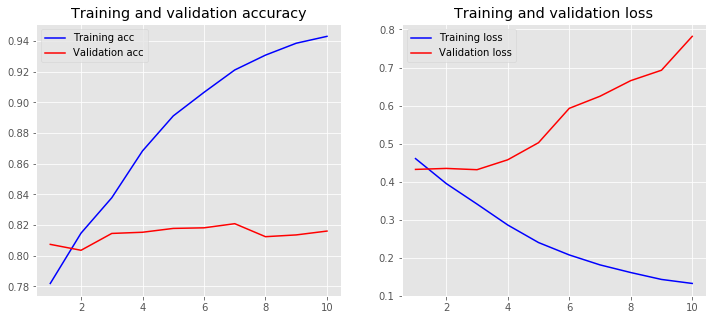

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=5, n_estimators=25, learning_rate=1)

model.fit(train_data, y_train)
y_pred = model.predict(test_data)

adaboost_filename = 'adaboost.pkl'
adaboost_model_pkl = open(adaboost_filename, 'wb')
pickle.dump(model, adaboost_model_pkl)
adaboost_model_pkl.close()
model_dict['adaboost'] = model
print("Model Saved")

print("Accuracy:", accuracy_score(y_test, y_pred))
model.score(test_data,y_test)

Model Saved
Accuracy: 0.5667180277349769


0.5667180277349769

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1, n_estimators=20)

randForest_filename = 'randForest.pkl'
randForest_model_pkl = open(randForest_filename, 'wb')
pickle.dump(model, randForest_model_pkl)
randForest_model_pkl.close()
model_dict['randForest'] = model
print("Model Saved")

model.fit(train_data, y_train)
y_pred = model.predict(test_data)
print("Accuracy:",accuracy_score(y_test, y_pred))
model.score(test_data,y_test)

Model Saved
Accuracy: 0.5431432973805855


0.5431432973805855

Predicted     0     1   All
True                       
0          1355  1890  3245
1          1109  2136  3245
All        2464  4026  6490


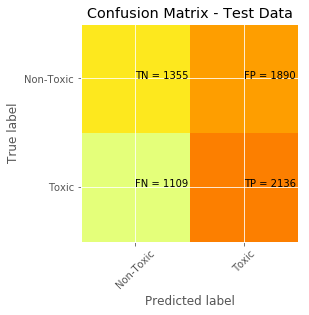

dTree
accuracy is -> 0.537904468412943
precision is -> 0.5305514157973175
recall is -> 0.6582434514637905
f_measure is -> 0.5875395406409022
Predicted    0     1   All
True                      
0           65  3180  3245
1           46  3199  3245
All        111  6379  6490


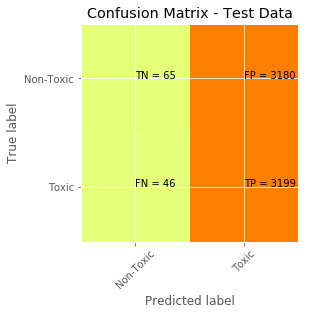

nb
accuracy is -> 0.5029275808936826
precision is -> 0.5014892616397555
recall is -> 0.9858243451463791
f_measure is -> 0.6647963424771406
Predicted     0     1   All
True                       
0           932  2313  3245
1           207  3038  3245
All        1139  5351  6490


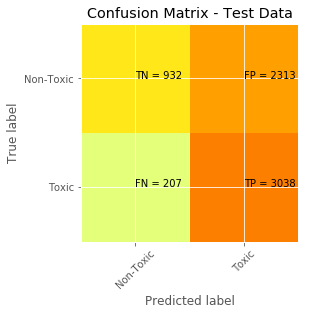

lr
accuracy is -> 0.6117103235747303
precision is -> 0.5677443468510559
recall is -> 0.9362095531587057
f_measure is -> 0.7068403908794788
Predicted     0     1   All
True                       
0           946  2299  3245
1           227  3018  3245
All        1173  5317  6490


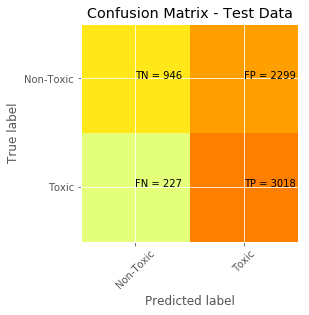

ensemble_vote
accuracy is -> 0.6107858243451464
precision is -> 0.567613315779575
recall is -> 0.9300462249614792
f_measure is -> 0.7049754730203223
Predicted    0     1   All
True                      
0          618  2627  3245
1          185  3060  3245
All        803  5687  6490


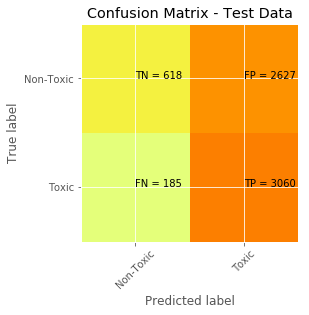

adaboost
accuracy is -> 0.5667180277349769
precision is -> 0.5380692808158959
recall is -> 0.9429892141756548
f_measure is -> 0.6851768920734437
Predicted    0     1   All
True                      
0          621  2624  3245
1          341  2904  3245
All        962  5528  6490


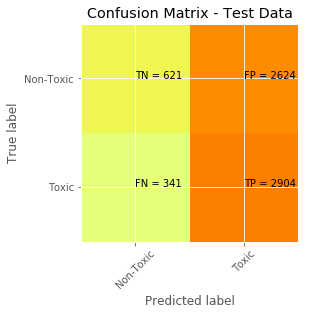

randForest
accuracy is -> 0.5431432973805855
precision is -> 0.5253256150506512
recall is -> 0.8949152542372881
f_measure is -> 0.6620312321896729


In [0]:
import sklearn.metrics as metrics

# Generate ROC curve for all the models

for model_name, model in model_dict.items(): 
  # calculate the fpr and tpr for all thresholds of the classification
  if model_name == 'doc2vec':
    continue
  elif model_name == 'sequential':
    continue
    y_pred_test = model.predict(np.array(test_data))
  else:
    y_pred_test = model.predict(test_data)
    
  cm=metrics.confusion_matrix(y_test, y_pred_test)
  #print(cm)
  print(pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Non-Toxic','Toxic']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  
  
  plt.show()
  print(model_name)
  accuracy_confusion_model = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
  precision_confusion_model = (cm[1][1])/(cm[0][1]+cm[1][1])
  recall_confusion_model = (cm[1][1])/(cm[1][0]+cm[1][1])
  f_measure_confusion_model = 2*(precision_confusion_model*recall_confusion_model)/(precision_confusion_model+recall_confusion_model)

  print("accuracy is -> " + str(accuracy_confusion_model))
  print("precision is -> " + str(precision_confusion_model))
  print("recall is -> " + str(recall_confusion_model))
  print("f_measure is -> " + str(f_measure_confusion_model))

<class 'pandas.core.series.Series'>


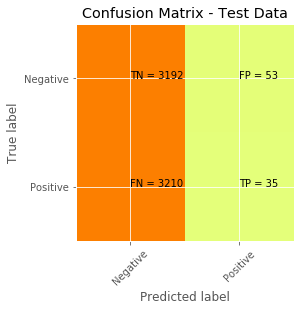

accuracy is -> 0.4972265023112481
precision is -> 0.3977272727272727
recall is -> 0.01078582434514638
f_measure is -> 0.021002100210021007


In [0]:



from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

filename = 'sequential.pkl'
dt_clf = pickle.load(open(filename, 'rb'))


y_pred_test = dt_clf.predict(np.array(test_data))
print(type(y_test))

y_pred = []
for x in test_data:
  if x[0] > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
    
y_pred_test = pd.Series(y_pred)





cm=metrics.confusion_matrix(y_test, y_pred_test)


plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

accuracy_confusion_model = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
precision_confusion_model = (cm[1][1])/(cm[0][1]+cm[1][1])
recall_confusion_model = (cm[1][1])/(cm[1][0]+cm[1][1])
f_measure_confusion_model = 2*(precision_confusion_model*recall_confusion_model)/(precision_confusion_model+recall_confusion_model)

print("accuracy is -> " + str(accuracy_confusion_model))
print("precision is -> " + str(precision_confusion_model))
print("recall is -> " + str(recall_confusion_model))
print("f_measure is -> " + str(f_measure_confusion_model))